# **Studi Kasus Pembelajaran Mendalam untuk Masalah Klasifikasi: Pengenalan Tulisan Tangan Digit**


Tugas ini melakukan eksplorasi model CNN untuk masalah Pengenalan Tulisan Tangan Digit (Digit Recognition). Dataset yang digunakan menggunakan dataset MNIST. Eksplorasi dilakukan untuk menjawab pertanyaan-pertanyaan berikut:

*   Berapa banyaknya convolution layar yang optimal?
*   Berapa ukuran filter yang optimal untuk setiap convolution layar?
*   Berapa banyaknya filter yang optimal untuk setiap convolution layar?
*   Berapa banyaknya hidden unit yang optimal pada bagian fully connected
network?

Untuk mengetahui nilai yang paling optimal, harus dilakukan percobaan dengan membuat variasi nilai dari hypermarater yang sedang dieksplorasi dengan nilai hyperparameter lainnya dibuat tetap (fixed). Jika ada nilai hyperparameter lainnya yang sudah ditemukan pada eksplorasi sebelumnya, gunakan nilai hyperparameter optimal tsb pada eksplorasi berikutnya Nilai optimal diambil dari percobaan yang menghasilkan kinerja terbaik.

Kami akan menggunakan set data pelatihan dan pengujian yang sama seperti sebelumnya, dan melanjutkan dengan cara yang sama seperti jaringan kami yang sepenuhnya terhubung untuk menentukan dan melatih model CNN baru kami. Untuk melakukan ini, kita akan menjelajahi dua layer yang belum pernah kita temui sebelumnya: Anda dapat menggunakan keras.layers.Conv2D untuk mendefinisikan layer convolutional dan keras.layers.MaxPool2D untuk mendefinisikan layer pooling. Gunakan parameter yang ditunjukkan dalam arsitektur jaringan di atas untuk menentukan lapisan ini dan membangun model CNN.

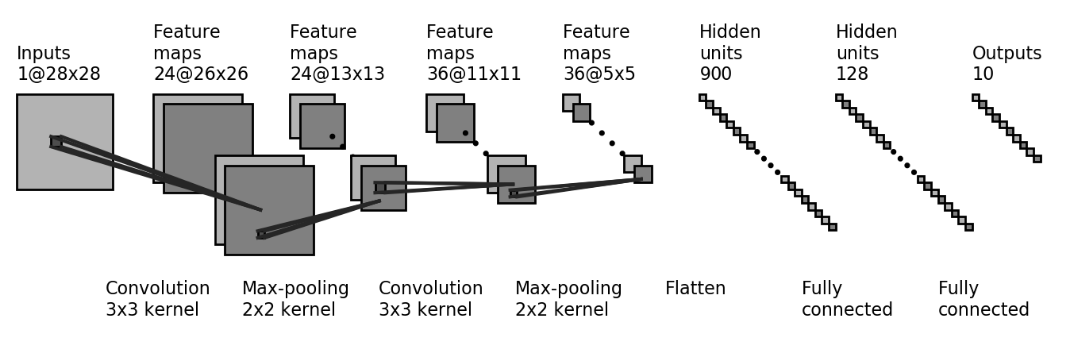

     |████████████████████████████████| 2.1 MB 12.0 MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.2.0-py3-none-any.whl size=2115442 sha256=51a9f63186e7b3b1506c385bd5c84bab4132487f962675e747ff01bb26e911cc
  Stored in directory: /root/.cache/pip/wheels/9a/b9/4f/99b7c8c5c75355550b83e1fcfc02956fb40c35eb01e2262877
Successfully built mitdeeplearning
11501568/11490434 [==============================] - 0s 0us/step


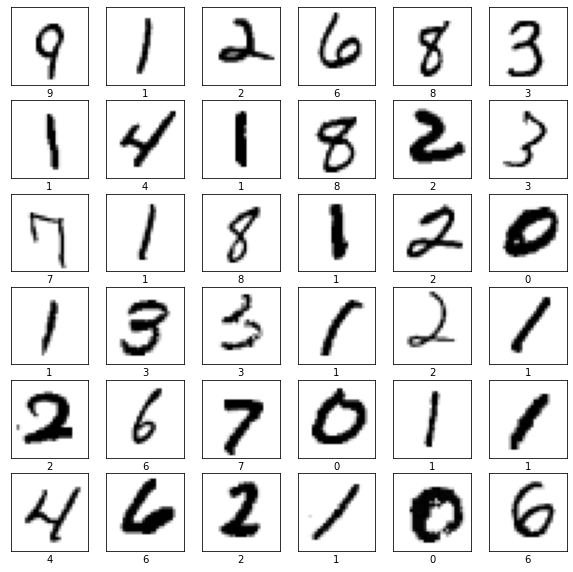

In [2]:
# Import Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf 

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
assert len(tf.config.list_physical_devices('GPU')) > 0

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])


In [3]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        # Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
        # tf.keras.layers.Conv2D('''TODO''') 

        #  Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # tf.keras.layers.MaxPool2D('''TODO''')

        # Define the second convolutional layer
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),
        # tf.keras.layers.Conv2D('''TODO''')

        # Define the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # tf.keras.layers.MaxPool2D('''TODO''')

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 36)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 900)               0         
                                                                 
 dense (Dense)               (None, 128)               1

**Pelatihan dan Pengujian model CNN**

Kita dapat mendefinisikan fungsi loss, optimizer, dan metrik melalui metode kompilasi. Kompilasi model CNN dengan pengoptimal dan tingkat pembelajaran pilihan:

In [4]:
'''TODO: Define the compile operation with your optimizer and learning rate of choice'''
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Untuk melatih CNN kami menggunakan metode fit melalui Keras API.

In [5]:
BATCH_SIZE = 64
EPOCHS = 5
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 7s 6ms/step - loss: 0.1707 - accuracy: 0.9499
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0532 - accuracy: 0.9833
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0375 - accuracy: 0.9884
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0272 - accuracy: 0.9916
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0218 - accuracy: 0.9932


Selanjutnya melatih model, untuk mengevaluasi pada dataset uji menggunakan metode evaluasi:

In [6]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0301 - accuracy: 0.9896
Test accuracy: 0.9896000027656555


**Buat prediksi dengan model CNN**

Dengan model yang terlatih, kita dapat menggunakannya untuk membuat prediksi tentang beberapa gambar. Panggilan fungsi prediksi menghasilkan prediksi keluaran yang diberikan satu set sampel masukan.

In [7]:
predictions = cnn_model.predict(test_images)

Dengan pemanggilan fungsi ini, model telah memprediksi label untuk setiap gambar dalam set pengujian. Mari kita lihat prediksi untuk gambar pertama di dataset uji:

In [8]:
predictions[0]

array([1.3692478e-07, 6.9195892e-08, 7.8136412e-07, 1.2015638e-06,
       1.5837569e-09, 3.4908542e-08, 9.2402891e-12, 9.9999225e-01,
       4.9611663e-07, 5.1297220e-06], dtype=float32)

Seperti yang Anda lihat, prediksi adalah array 10 angka. Ingatlah bahwa output dari model kita adalah distribusi probabilitas pada 10 kelas digit. Dengan demikian, angka-angka ini menggambarkan "keyakinan" model bahwa gambar sesuai dengan masing-masing dari 10 digit yang berbeda.

Mari kita lihat digit yang memiliki kepercayaan tertinggi untuk gambar pertama di dataset uji:

7
Label of this digit is: 7


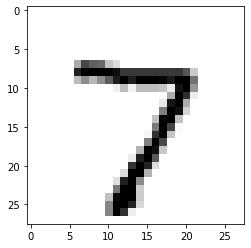

In [9]:
prediction = np.argmax(predictions[0]) 
print(prediction)
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

# **Eksplorasi CNN yang Lebih Dalam**

**Berapa banyaknya convolution layar yang optimal?**

Dalam percobaan ini digunakan satu, dua dan tiga convolutionl layer untuk menunjukkan pengaruh jumlah konvolusional terhadap akurasi testing. 

In [10]:
def build_cnn_model_satu_conv():
    cnn_model = tf.keras.Sequential([

        # Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),

        #  Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model_satu_conv()
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
BATCH_SIZE = 64
EPOCHS = 5
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1880 - accuracy: 0.9446
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0640 - accuracy: 0.9807
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0428 - accuracy: 0.9869
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0306 - accuracy: 0.9904
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0422 - accuracy: 0.9862
Test accuracy: 0.9861999750137329


In [12]:
def build_cnn_model_dua_conv():
    cnn_model = tf.keras.Sequential([

        # Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),

        #  Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        # Define the second convolutional layer
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),

        # Define the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model_dua_conv()
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
BATCH_SIZE = 64
EPOCHS = 5
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
938/938 [==============================] - 6s 6ms/step - loss: 0.1822 - accuracy: 0.9449
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0563 - accuracy: 0.9826
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0381 - accuracy: 0.9882
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0287 - accuracy: 0.9911
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0322 - accuracy: 0.9889
Test accuracy: 0.9889000058174133


In [13]:
def build_cnn_model_tiga_conv():
    cnn_model = tf.keras.Sequential([

        # Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),

        #  Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        # Define the second convolutional layer
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),

        # Define the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

       # Define the third max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model_tiga_conv()
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
BATCH_SIZE = 64
EPOCHS = 5
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
938/938 [==============================] - 6s 6ms/step - loss: 0.3533 - accuracy: 0.8940
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.1116 - accuracy: 0.9650
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0847 - accuracy: 0.9738
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0681 - accuracy: 0.9783
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0572 - accuracy: 0.9819
Test accuracy: 0.9818999767303467


Dari tiga percobaan diatas diperoleh hasil:

*   akurasi tes satu konvolusi layer : 0.9861999750137329
*   akurasi tes dua konvolusi layer : 0.9889000058174133
*   akurasi tes tiga konvolusi layer : 0.9818999767303467

Hasil tersebut menunjukkan bahwa dengan satu konvolusi layer sudah cukup baik dalam hal akurasi.

**Berapa banyaknya filter yang optimal untuk setiap convolution layar?**

Untuk mengetahui pengaruh jumlah filter rerhadap akurasidilakukan beberapa percobaan berikut:



In [14]:
def build_cnn_model_16_filter():
    cnn_model = tf.keras.Sequential([

        # Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation=tf.nn.relu),

        #  Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model_16_filter()
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
BATCH_SIZE = 64
EPOCHS = 5
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1918 - accuracy: 0.9447
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0654 - accuracy: 0.9804
Epoch 3/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0438 - accuracy: 0.9866
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0322 - accuracy: 0.9904
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0363 - accuracy: 0.9875
Test accuracy: 0.987500011920929


In [15]:
def build_cnn_model_32_filter():
    cnn_model = tf.keras.Sequential([

        # Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu),

        #  Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model_32_filter()
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
BATCH_SIZE = 64
EPOCHS = 5
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1810 - accuracy: 0.9472
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0592 - accuracy: 0.9823
Epoch 3/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0396 - accuracy: 0.9879
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0279 - accuracy: 0.9909
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0376 - accuracy: 0.9873
Test accuracy: 0.9872999787330627


In [16]:
def build_cnn_model_40_filter():
    cnn_model = tf.keras.Sequential([

        # Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=40, kernel_size=(3,3), activation=tf.nn.relu),

        #  Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model_40_filter()
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
BATCH_SIZE = 64
EPOCHS = 5
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
938/938 [==============================] - 6s 6ms/step - loss: 0.1694 - accuracy: 0.9503
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0572 - accuracy: 0.9826
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0385 - accuracy: 0.9882
Epoch 4/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0266 - accuracy: 0.9918
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0459 - accuracy: 0.9859
Test accuracy: 0.9858999848365784


Dari variasi jumlah filter diperoleh hasil sebagai berikut:

*   Jumlah filter 16: akurasi = 0.987500011920929
*   Jumlah filter 32: akurasi = 0.9872999787330627
*   Jumlah filter 40: akurasi = 0.9858999848365784

Dari hasil tersebut jumlah filter 16 sudah memberikan akurasi yang cukup baik.



**Berapa ukuran filter yang optimal untuk setiap convolution layar?**

Ukuran filter dalam CNN digunakan untuk ekstraksi ciri sehingga perlu dilakukan optimasi ukuran filter yang sesuai. Beberapa ukuran filter yang digunakan berupa 3x3, 5x5, dan 7x7

In [23]:
def build_cnn_model_filter_3x3():
    cnn_model = tf.keras.Sequential([

        # Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation=tf.nn.relu),

        #  Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model_filter_3x3()
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
BATCH_SIZE = 64
EPOCHS = 5
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1928 - accuracy: 0.9453
Epoch 2/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0620 - accuracy: 0.9811
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0427 - accuracy: 0.9866
Epoch 4/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0296 - accuracy: 0.9909
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0398 - accuracy: 0.9868
Test accuracy: 0.9868000149726868


In [17]:
def build_cnn_model_filter_5x5():
    cnn_model = tf.keras.Sequential([

        # Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation=tf.nn.relu),

        #  Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model_filter_5x5()
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
BATCH_SIZE = 64
EPOCHS = 5
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1846 - accuracy: 0.9457
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0577 - accuracy: 0.9828
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0381 - accuracy: 0.9887
Epoch 4/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0287 - accuracy: 0.9907
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0342 - accuracy: 0.9887
Test accuracy: 0.9886999726295471


In [18]:
def build_cnn_model_filter_7x7():
    cnn_model = tf.keras.Sequential([

        # Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=16, kernel_size=(7,7), activation=tf.nn.relu),

        #  Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model_filter_7x7()
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
BATCH_SIZE = 64
EPOCHS = 5
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1684 - accuracy: 0.9503
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0538 - accuracy: 0.9834
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0376 - accuracy: 0.9881
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0272 - accuracy: 0.9911
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0382 - accuracy: 0.9879
Test accuracy: 0.9879000186920166


Variasi ukuran filter diperoleh hasil sebagai berikut:

*   Ukuran filter 3x3: akurasi = 0.9894000291824341
*   Ukuran filter 5x5: akurasi = 0.9886999726295471
*   Ukuran filter 7x7: akurasi = 0.9879000186920166

Dari hasil tersebut ukuran filter 3x3 sudah memberikan akurasi yang cukup baik.



**Berapa banyaknya hidden unit yang optimal pada bagian fully connected network?**

Optimasi CNN dapat juga dilakukan pada bagian fully connected network. Berikut percobaan untuk mengamaati pengaruh hidden unit terhadap akurasi:




In [22]:
def build_cnn_model_128_hidden():
    cnn_model = tf.keras.Sequential([

        # Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation=tf.nn.relu),

        #  Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model_128_hidden()
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
BATCH_SIZE = 64
EPOCHS = 5
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1895 - accuracy: 0.9462
Epoch 2/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0605 - accuracy: 0.9818
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0407 - accuracy: 0.9875
Epoch 4/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0295 - accuracy: 0.9911
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0440 - accuracy: 0.9843
Test accuracy: 0.9843000173568726


In [20]:
def build_cnn_model_256_hidden():
    cnn_model = tf.keras.Sequential([

        # Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation=tf.nn.relu),

        #  Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation=tf.nn.relu),

        # Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model_256_hidden()
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
BATCH_SIZE = 64
EPOCHS = 5
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1726 - accuracy: 0.9492
Epoch 2/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0572 - accuracy: 0.9828
Epoch 3/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0362 - accuracy: 0.9889
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0253 - accuracy: 0.9922
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0391 - accuracy: 0.9862
Test accuracy: 0.9861999750137329


In [21]:
def build_cnn_model_512_hidden():
    cnn_model = tf.keras.Sequential([

        # Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation=tf.nn.relu),

        #  Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),

        # Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model_512_hidden()
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
BATCH_SIZE = 64
EPOCHS = 5
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1512 - accuracy: 0.9550
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0472 - accuracy: 0.9849
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0306 - accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0216 - accuracy: 0.9929
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0405 - accuracy: 0.9879
Test accuracy: 0.9879000186920166


Berikut hasil akurasi terhdap variasi jumlah unit dalam hidden layer:

*   Hidden layer 128 unit, akurasi = 0.9843000173568726
*   Hidden layer 256 unit, akurasi = 0.9861999750137329
*   Hidden layer 512 unit, akurasi = 0.9879000186920166

Hidden unit sebanyak 128 memberikan akurasi yang hampir sama dengan 256 unit bahkan 512 unit.